# Predicting Absenteeism

Author: Tijs Van den Heuvel

## Introduction

The goal of this data analysis report is to predict if an employee will be absent often based on variables of the _Absenteeism At Work_ dataset. Absence is classified as often when it exceeds 10 hours.

The client didn't specify any success criteria so the success criterion of the learner will be set at an accuracy of 90%. 

Feature contribution will be examined. The hypothesis is that BMI is the most contributing factor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

## The data
The data resides in the file `Absenteeism_at_work.csv` and was collected from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

The variables that we will use to make a prediction are

| variable                          |  type      | range |
|:---------------------------------------------|-------------:|----------------:|
| `Distance from Residence to Work` |  kilometers | 5-52 |
| `Service time` |   years  | 1-29 |
| `Age` | years | 27-58 |
| `Transportation expense` | dollars? | 118-388 |
| `Work load Average/day` | amount of work?| 205.917-378.884
| `Education` | level | 1-4 |
| `Social drinker` |yes / no| 0-1 |
| `Social smoker` | yes / no | 0-1 |
| `Body mass index` | BMI | 19-38 |
| `Pet` | number of pets | 0-8 |
| `Son` | number of children | 0-4 |

The target variable is `Absenteeism time in hours` but we want to know if the value is more than 10 hours or not 

so the target value will be transformed

In [13]:

df = pd.read_csv("Absenteeism_at_work_AAA/Absenteeism_at_work.csv", sep=";")
feat = df[["Distance from Residence to Work","Service time","Age","Transportation expense","Work load Average/day ","Education","Social drinker","Social smoker","Body mass index","Pet","Son"]]
outc_bin = [0 for x in range(0,740)]
count=0
for i in range(0,740):
    if df["Absenteeism time in hours"][i]>10:
        outc_bin[i]=1
        count+=1
outc = pd.DataFrame(outc_bin,columns=['Absenteeism often'])
print(f"the share of instances with significant absence is {100*count/740:.2f}%")

top_feat=df["Work load Average/day "]

the share of instances with significant absence is 8.51%


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Splitting the data

The data will be split into a training set (1/3), a validation set (1/3) and a testing set (1/3)

- feat_trai + outc_trai
- feat_vali + outc_vali
- feat_test + outc_test


In [3]:
feat_trai_vali, feat_test, outc_trai_vali, outc_test = train_test_split(feat, outc, test_size=0.33, random_state=42)

feat_trai, feat_vali, outc_trai, outc_vali = train_test_split(feat_trai_vali, outc_trai_vali, test_size=0.50, random_state=42)


## Fit the learner

In [4]:
learner_GNB = GaussianNB()
learner_GNB.fit(feat_trai, outc_trai)

print(f"Performance of the Gaussian Naive Bayes classifier is {learner_GNB.score(feat_vali,outc_vali):.2%}")

learner = tree.DecisionTreeClassifier(max_depth=5,random_state=42)
learner.fit(feat_trai, outc_trai)

print(f"Performance of the decision tree classifier is {learner.score(feat_vali,outc_vali):.2%}")

Performance of the Gaussian Naive Bayes classifier is 85.08%
Performance of the decision tree classifier is 89.11%


## Compare Performance

In [5]:
outc_pred = learner_GNB.predict(feat_vali)
cm=confusion_matrix(outc_vali, outc_pred, labels=[1, 0])
tp, fp, fn, tn = cm.ravel()
print("Performance of the Gaussian Naive Bayes classifier")
print(cm)
print(f"\nsensitivity = {tp/(tp+fn):.3f}")
print(f"specificity = {tn/(tn+fp):.3f}")
print(f"precision = {tp/(tp+fp):.3f}")
print(f"accuracy = {(tp+tn)/(tn+tp+fn+fp):.3f}")

print("\nPerformance of the decision tree classifier")
outc_pred = learner.predict(feat_vali)
cm=confusion_matrix(outc_vali, outc_pred, labels=[1, 0])
tp, fp, fn, tn = cm.ravel()
print(cm)
print(f"\nsensitivity = {tp/(tp+fn):.3f}")
print(f"specificity = {tn/(tn+fp):.3f}")
print(f"precision = {tp/(tp+fp):.3f}")
print(f"accuracy = {(tp+tn)/(tn+tp+fn+fp):.3f}")

Performance of the Gaussian Naive Bayes classifier
[[  1  24]
 [ 13 210]]

sensitivity = 0.071
specificity = 0.897
precision = 0.040
accuracy = 0.851

Performance of the decision tree classifier
[[  1  24]
 [  3 220]]

sensitivity = 0.250
specificity = 0.902
precision = 0.040
accuracy = 0.891


The decision tree classifier has overall the highest score and is the learner that will be used in the rest of the document.

## Feature contribution

In [6]:
cont = learner.feature_importances_
cont_nonz = np.ndarray.nonzero(cont)
cont_nonz_list = []
for item in cont_nonz:
    cont_nonz_list.extend(item)
cont_nonz = sorted(cont_nonz_list,key=lambda i:cont[i],reverse=False)
sorted_nonz_name_list=feat_trai.columns.values[cont_nonz]

print("sorted non zero contributing features names: \n")
print(sorted_nonz_name_list)

sorted non zero contributing features names: 

['Age' 'Social smoker' 'Service time' 'Transportation expense'
 'Distance from Residence to Work' 'Work load Average/day ']


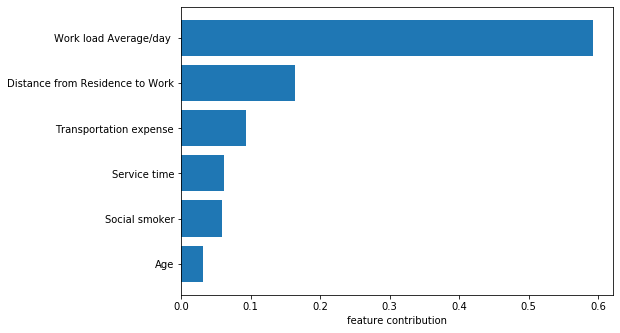

In [7]:
nonz_cont_vals=[]
for i in cont_nonz:
    nonz_cont_vals.append(cont[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(sorted_nonz_name_list,nonz_cont_vals)
plt.xlabel("feature contribution")
plt.show()

## Find optimal feature set

[0.8911290322580645, 0.8911290322580645, 0.8911290322580645, 0.8790322580645161, 0.8669354838709677, 0.8991935483870968]


Text(0, 0.5, 'learner score')

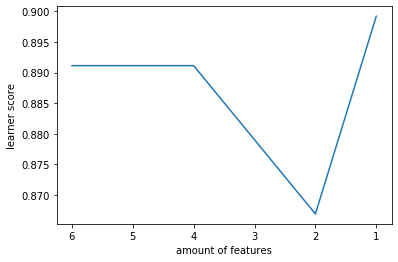

In [8]:

feat_trai_nonz = feat_trai[sorted_nonz_name_list]
feat_vali_nonz = feat_vali[sorted_nonz_name_list]

scores=[]
numbers=[]
size = len(sorted_nonz_name_list)
f_trai=feat_trai_nonz
f_vali=feat_vali_nonz

for item in sorted_nonz_name_list:
    learner.fit(f_trai,outc_trai)
    scores.append(learner.score(f_vali,outc_vali))
    numbers.append(str(size))
    
    f_trai=f_trai.drop(item,1)
    f_vali=f_vali.drop(item,1)
    size-=1
print(scores)
plt.plot(numbers,scores) 
plt.xlabel("amount of features")
plt.ylabel("learner score")


It appears that `Work load Average/day` alone best predicts absence.

In [9]:
feat_trai_top = feat_trai[['Work load Average/day ']]
feat_vali_top = feat_vali[['Work load Average/day ']]
learner.fit(feat_trai_top,outc_trai)
learner.score(feat_vali_top,outc_vali)



0.8991935483870968

## Visualization of Work load Average/day 

Is absence common in high workload or low workload ?

Text(0, 0.5, 'Work load Average/day')

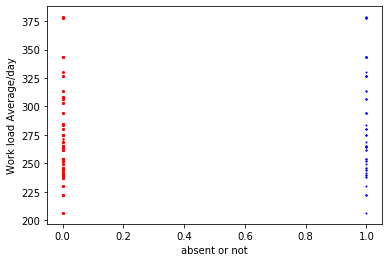

In [10]:
wdad1=[]
wdad0=[]
nr = [x for x in range(0,740)]
count=0
for i in range(0,740):
    if(outc['Absenteeism often'][i]==1):
        wdad1.append(top_feat[i])
    else:
        wdad0.append(top_feat[i])
len_wdad1 = [1 for x in range(len(wdad1))]
len_wdad0 = [0 for x in range(len(wdad0))]
plt.scatter(len_wdad1,wdad1,s=1,c='blue')
plt.scatter(len_wdad0,wdad0,s=1,c='red')
plt.xlabel("absent or not")
plt.ylabel("Work load Average/day")

The absent and non absent distribution look quite the same, independent of work load

## Performance: nonzero versus `Work load Average/day`

In [11]:
feat_test_top= feat_test[['Work load Average/day ']]
feat_test_nonz= feat_test[sorted_nonz_name_list]

learner.fit(feat_trai_top,outc_trai)
outc_pred = learner.predict(feat_test_top)
cm=confusion_matrix(outc_test, outc_pred, labels=[1, 0])
tp, fp, fn, tn = cm.ravel()
print("Performance of only `Work load Average/day`")
print(cm)
print(f"\nsensitivity = {tp/(tp+fn):.3f}")
print(f"specificity = {tn/(tn+fp):.3f}")
print(f"precision = {tp/(tp+fp):.3f}")
print(f"accuracy = {(tp+tn)/(tn+tp+fn+fp):.3f}")

learner.fit(feat_trai_nonz,outc_trai)
print("\nPerformance of all contributing features")
outc_pred = learner.predict(feat_test_nonz)
cm=confusion_matrix(outc_test, outc_pred, labels=[1, 0])
tp, fp, fn, tn = cm.ravel()
print(cm)
print(f"\nsensitivity = {tp/(tp+fn):.3f}")
print(f"specificity = {tn/(tn+fp):.3f}")
print(f"precision = {tp/(tp+fp):.3f}")
print(f"accuracy = {(tp+tn)/(tn+tp+fn+fp):.3f}")

Performance of only `Work load Average/day`
[[  0  19]
 [  0 226]]

sensitivity = nan
specificity = 0.922
precision = 0.000
accuracy = 0.922

Performance of all contributing features
[[  0  19]
 [  2 224]]

sensitivity = 0.000
specificity = 0.922
precision = 0.000
accuracy = 0.914


## Conclusion

The goal was to predict if an employee will be abstinent often.
By often we mean more than 10 hours.

First a learner was chosen, 
The performance measures of the decision tree classifier were higher than the Naive Bayes classifier.

### measure the different score types

The contributing factors are

- `Work load Average/day`
- `Distance from Residence to Work`
- `Transportation expense`
- `Service time`
- `Social smoker`
- `Age`

The non-contributing factors are

- `Education`
- `Social drinker`
- `Body mass index`
- `Pet`
- `Son`

The hypothesis that BMI is the biggest contributing factor was wrong, the Work load Average per day is the biggest contributing factor.

Although the accuracy is good at 92.2%, the precision is zero and the sensitivity doesn't even exist.

Because the dataset contains very few instances with significant absence: 8.51%.

The learner always guesses non-absence, so it is most often correct but there are no true nor false positives.

This notebook could be optimized to focus more on true positives and to improve precision and sensitivity.

Be that as it may, the success criterion of an accuracy score above 90% has been met so further optimizations will be suspended until the skillset of the author has grown sufficiently.